## 시계열(Time Series) 데이터 필요조건

> 1. 과거의 데이터에 일정한 패턴이 발견되어야 함. <br><br>
> 2. 과거의 패턴은 미래에도 동일하게 반복되어야 함.

- 즉, 안정적(Stationary) 데이터에 대해서만 미래 예측이 가능.<br>(=시계열 데이터의 통계적 특성이 변하지 않는다.)

### 시계열(Time Series) 생성
- Daily Minimum Temperatures in Melbourne

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

---
**Python OS 모듈**
- Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해준다.<br>예를들어, Python을 이용해서 파일을 복사하거나 디렉토리를 생성하고 특정 디렉토리 내의 파일 목록을 구하고자 할 때 사용
---

In [31]:
# os.getcwd() # 현재 경로를 반환
os.listdir()


['.ipynb_checkpoints', 'Ex3_practice.ipynb']

In [32]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [33]:
# 이번에는 Date를 index_col로 지정해 주었습니다.

df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=False)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [34]:
# 시간 column이 index가 되었지만 아직도 type은 DataFrame으로 나온다. 우리가 찾는 시계열은 

ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

* 결측치 유무 확인하기

In [35]:
ts1[ts1.isnull()] # 시계열(time series)에서 결측치가 있는 부분(참인 행)만 series로 출력한다.

Series([], Name: Temp, dtype: float64)

#### 결측치가 있는 데이터 처리 방법
* 1) 결측치가 있는 데이터 모두 삭제(dropna)
* 2) 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
    * `df.interpolate()` or `ts.interpoltate()' << 내부 파라미터 method = 'time' / 'values'

Series([], Name: Temp, dtype: float64)


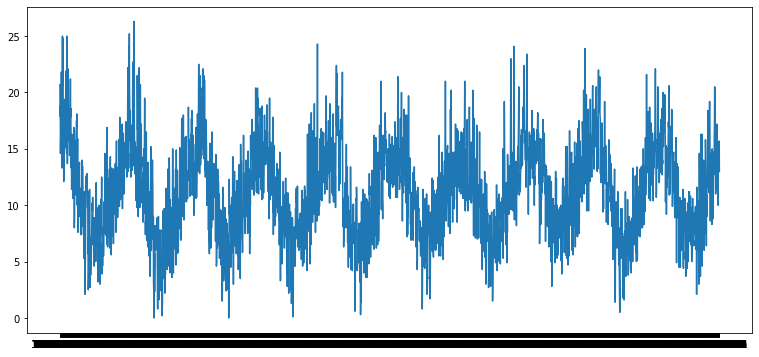

In [36]:
# 결측치가 있다면 이를 보간하는데 기준은 time을 선택함.
ts1 = ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인
print(ts1[ts1.isna()])

# 다시 그래프를 확인해보자
plt.plot(ts1)

#### 구간 통계치(Rolling Statistics)

1) 구간의 평균(Rolling Mean, 이동평균)  
2) 표준편차(Rolling std, 이동표준편차)

In [37]:
# 이동평균 및 이동표준편차를 구하는 함수를 작성해보자
# original 데이터와 이동평균 및 이동표준편차 데이터를 plotting 해보자

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열
    
    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화 해보자
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # return rolmean, rolstd
    

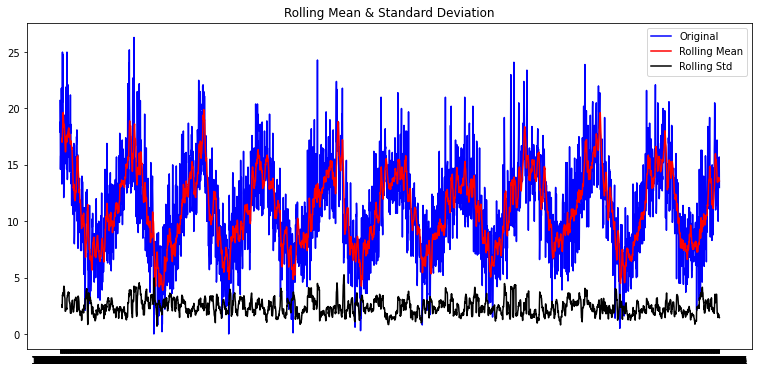

In [38]:
plot_rolling_statistics(ts1, window=12)

* 다른 데이터에 대해서도 비교해보자


* `Internatinal airline passengers`

In [39]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<class 'pandas.core.series.Series'>


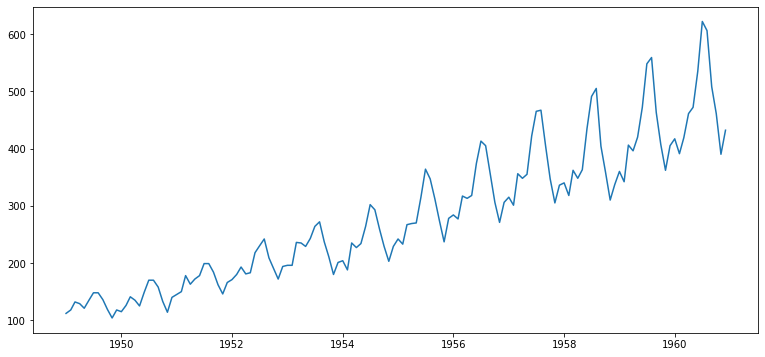

In [40]:
ts2 = df['Passengers']
print(type(ts2))
plt.plot(ts2)

**△ 시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 보인다. >> ★시각화를 통한 정성적 분석★**
* Rolling Statistics를 추가해서 시각화 해보자

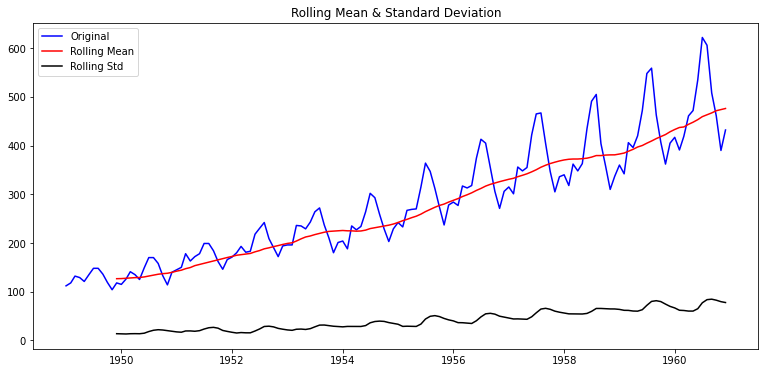

In [41]:
plot_rolling_statistics(ts2, 12)

---
* 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법을 다루어보자 >> ★정량적인 방법 적용★
---

### ★ Stationary 여부를 체크하는 통계적 방법(정량적 방법)

* `Augmented Dickey-Fuller Test(ADT Test)`


* #귀무가설(Null Hypothesis) #대립가설(Alternative Hypothesis) #p-value


* p-value : 귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본평균)가 나타날 확률
    - 즉, p가 낮다는 것은 귀무가설이 참이라는 가정하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻한다.
    - p값이 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고), <br>
      대안적인 가설 즉 대립가설을 채택한다.
    - **p 값은 0~1 사이의 값을 가지게 되며, 0과 가까울수록 귀무가설의 설득력이 약해진다.**

*** `statsmodels` 패키지에서 제공하는 `adfuller` 매서드를 이용해 ADF Test의 결과를 이용할 수 있다.**


> statsmodels 패키지는 R에서 제공하는 **통계검정**, **시계열분석** 등의 기능을 파이썬에서도 이용할 수 있도록 하는 **강력한 통계 패키지**

In [42]:
import numpy as np
import pandas as pd

tt = np.arange(4)
tt

dd = pd.Series(tt, index=['a', 'b', 'c', 'd'])
dd

a    0
b    1
c    2
d    3
dtype: int64

In [45]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 매서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')
    
    # adfuller 매서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [46]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


**△ ts1(Daily Minimum Temperatures in Melbourne) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깜게 나타남**

\>> 이 귀무가설은 기각되고 안정적 시계열 이라는 대립가설이 채택됨

In [47]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


△ ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타남.  
p-value가 1에 가깝다는 것은 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.)이 옳다는 직접적인 증거는 아니지만   
**이 귀무가설을 기각할 수는 없게 되었다. >> 안정적인 시계열이라고 말할 수 없다.**

---
### ★ 시계열 데이터를 Stationary하게 만들 수 있는 방법

> 1) 정성적인 분석을 통해 보다 안정적(Stationary)인 특성을 가지도록 기존의 시계열 데이터를 **__가공/변형__**하는 시도<br><br>
> 2) 시계열 분해(Time Series Decomposion) 기법을 적용
---

#### **1. 보다 Stationary 한 시계열로 가공해보기**

**1-1 로그함수 변환**
- 시간 추이에 따라 반산이 점점 커지고 있기 때문에, 로그함수 변환을 통해 스케일을 선형적으로 변환해보자


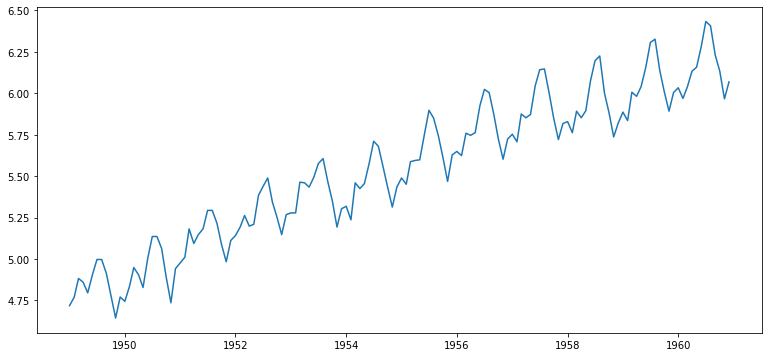

In [48]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [49]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


△ p-value가 0.42로 무려 절반 이상 줄었다.
<br><br>
#### 1-2. Moving Average 제거 -추세(Trend) 상쇄하기
    - 시계열 분석에 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 한다.
    - 거꾸로 Moving Average, 즉 rolling mean을 구해서 `ts_log`에서 뻬주면 된다.

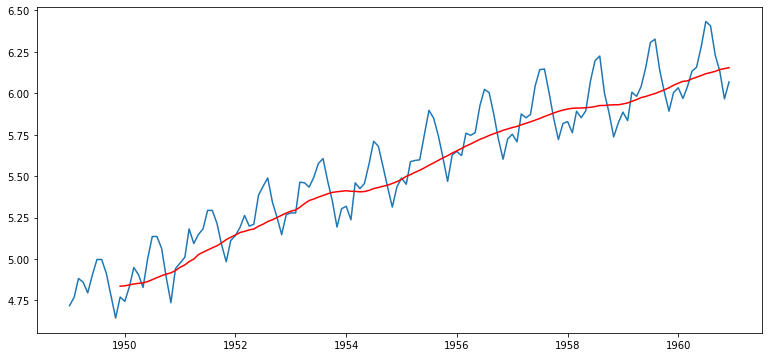

In [51]:
moving_avg = ts_log.rolling(window=12).mean() # moving average 구하기
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [67]:
ts_log_moving_avg = ts_log - moving_avg  # 변화량 제거
print(ts_log_moving_avg.head(15))
print(ts_log_moving_avg.shape)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64
(144,)


**Moving Average 계산 시 (window =12) 앞의 11개 데이터는 MA가 계산되지 않으므로 결측치 발생**

In [68]:
# moving average 계산 시, window size를 12개로 잡았기 때문에 11개의 데이터는 moving average가 계산되지 않고 결측치로 발생하게 된다.
# 따라서, 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 수 있으므로 데이터셋에서 제거해준다.

ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)
print(ts_log_moving_avg.shape)

(133,)


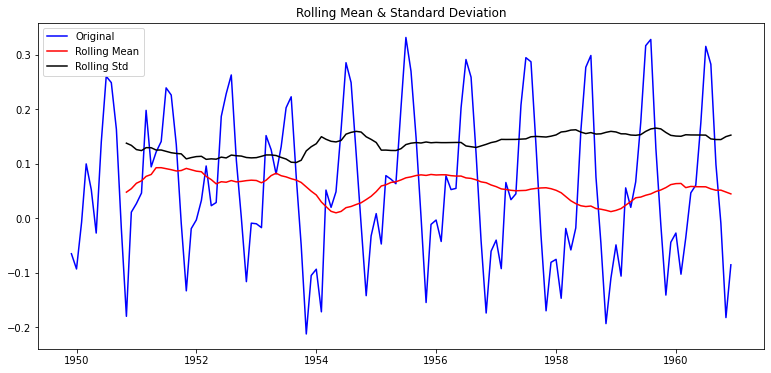

In [59]:
# 이전 스텝에서 정의했던 매서드들을 활용하여 `ts_log_moving_avg`를 정성,정량적으로 분석해보자

plot_rolling_statistics(ts_log_moving_avg)

In [69]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


* p-value가 0.02 수준이 되었다.  95% 이상의 confidence(신뢰수준)로 이 time series는 stationary 하다고 할 수 있다.

#### 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

- Trend(추세)에는 잡히지 않지만 시계열 데이터 안에 포함된 **패턴이 파악되지 않는 주기적 변화**는 예측의 방해가 되는 불안정성 요소<br>이것은 Moving Average 제거로도 상쇄되지 않는 효과
<br>
- 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.

In [74]:
ts_log_moving_avg

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: Passengers, Length: 133, dtype: float64

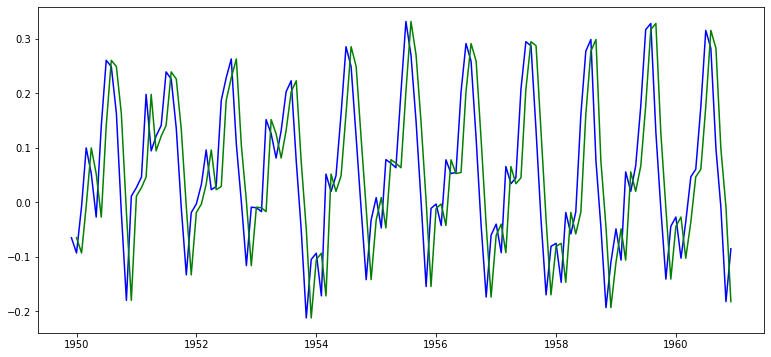

In [76]:
# 차분(Difference)를 이용해서 시계열 한 스텝 앞으로 시프트한 시계열을 원래의 시계열에 빼주는 방법으로 
# 스탭의 변화량을 파악할 수 있다.

ts_log_moving_avg_shift = ts_log_moving_avg.shift(periods=1)

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

Month
1950-01-01   -0.027955
1950-02-01    0.085883
1950-03-01    0.106981
1950-04-01   -0.047274
1950-05-01   -0.079671
                ...   
1960-08-01   -0.032788
1960-09-01   -0.184128
1960-10-01   -0.107465
1960-11-01   -0.173460
1960-12-01    0.096901
Name: Passengers, Length: 132, dtype: float64


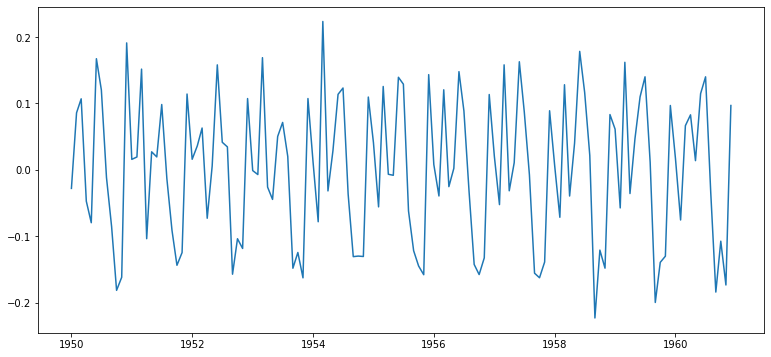

In [77]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해보자

ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)
print(ts_log_moving_avg_diff)

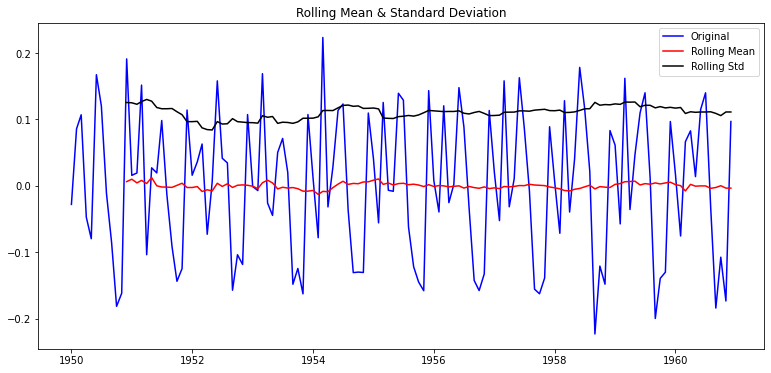

In [78]:
# 이동평균, 이동표준편차를 그래프에 나타내어 정성적(안정적)으로 안정성(Stationary) 여부를 파악해 보자

plot_rolling_statistics(ts_log_moving_avg_diff)

In [82]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


**이동평균을 빼주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022에서 0.0019로 1/10 정도로 줄었다.**

## 2. 시계열 분해(Time Series Decomposition)

- `Statsmodel` 라이브러리 ㅣ안에는 `seasonal_decompose` 매서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있다.<br>이 기능을 활용하면 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 된다.

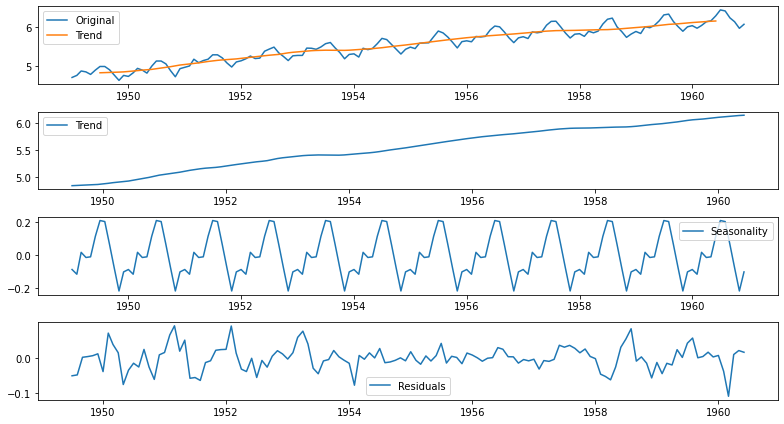

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화)
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams['figure.figsize'] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

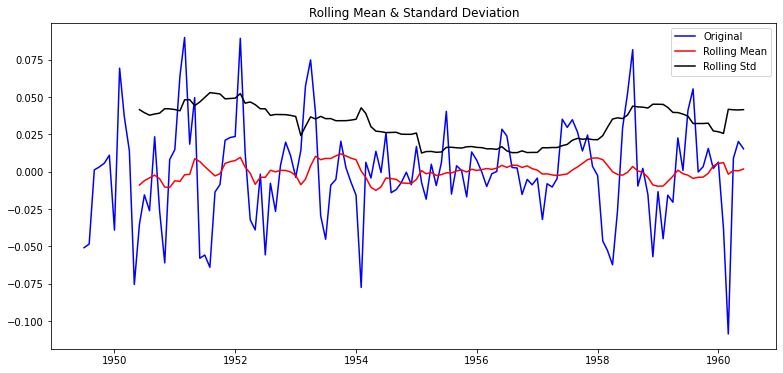

In [92]:
# Residual에 대해 안정성 여부를 판단해보자

plt.rcParams['figure.figsize'] = (13,6)
plot_rolling_statistics(residual)

In [93]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


---
<br><br>
# 3-7. ARIMA 모델의 개념

**ARIMA(Autoregressive Integrated Moving Average**

---


### 1-1. AR(자기회귀, Autoregressive)

- 과거 값들에 대한 회귀로 미래값을 예측하는 방법
- Y(t)가 이전 p개의 데이터 Y(t-1), Y(t-2), ..., Y(t-p)의 가중합으로 수렴한다고 보는 모델<br>
![image](https://user-images.githubusercontent.com/103712369/166867820-b803867b-673c-4bc7-b2a3-7d97892a77c1.png) <br>

> AR은 시계열의 Residual에 해당하는 부분을 모델링한다.<br>
> 가중치의 크기가 1보다 작은 Y(t-1), Y(t-2)...Y(t-p)의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치<br>
> 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점<br>

<br>

### 1-2. MA(이동평균, Moving Average)
<br>

![image](https://user-images.githubusercontent.com/103712369/166868168-3053641f-249a-42ce-8c0a-b6eacc3b3957.png)
<br>
- MA는 Y(t)가 이전 1개의 예측오차값 e(t-1), e(t-2), ..., e(t-q)의 가중합으로 수렴한다고 보는 모델
<br>

![image](https://user-images.githubusercontent.com/103712369/166868288-322d83ac-4f0a-453c-96e5-4d240c9d5ae9.png)
<br>

> MA는 시계열의 Trend에 해당하는 부분을 모델링<br>
> 예측오차값 e(t-1)(=y_act(t-1) - y_hat(t-1)이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻<br>
> 다음 Y(t) 예측시에는 예측치를 올려잡게 된다.<br>
> 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점이라고 볼 수 있다.<br>

### 1-3. I(차분누적, Integration)

**`I`는 Y(t)의 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델**


- `I`는 시계열의 `Seasonality`에 해당하는 부분을 모델링
- d = 1이라면 Y(t)는 Y(t-1)과 deltaY(t-1)의 합으로 보는것

<br>

## 2. Arima 모델의 모수 p, q, d

**`ARIMA`모델의 모수는 p,d,q**
<br>

- `p`와 `q`는 일반적으로 `p+q<2`, `p*q=0`


---

<br>

**ARIMA의 적절한 모수 p,q,r을 선택하는 방법으로 대표적인 방법**<br>
- ACF(AutoCorrelation Function) & PACF(Partial Autocorrelation Function)<br>
    


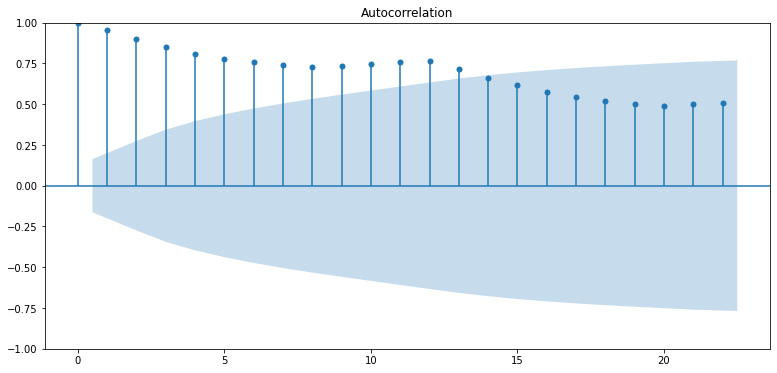

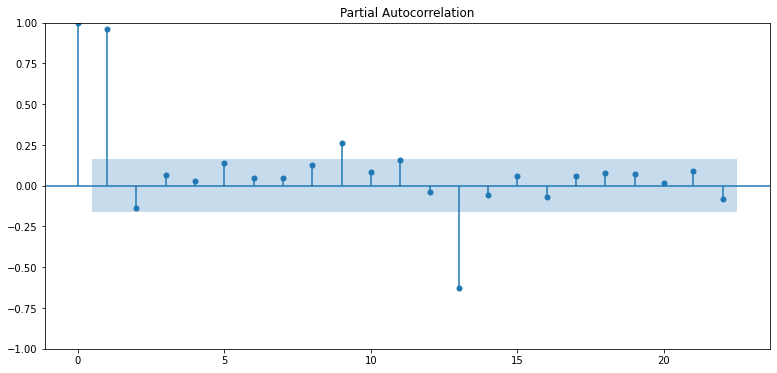

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

이 결론에 따라 보자면 PACF 그래프를 볼 때 p=1이 매우 적합한 것 같습니다. p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문입니다. PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.
반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있습니다. q에 대해서는 적합한 값이 없어 보입니다. MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋겠습니다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


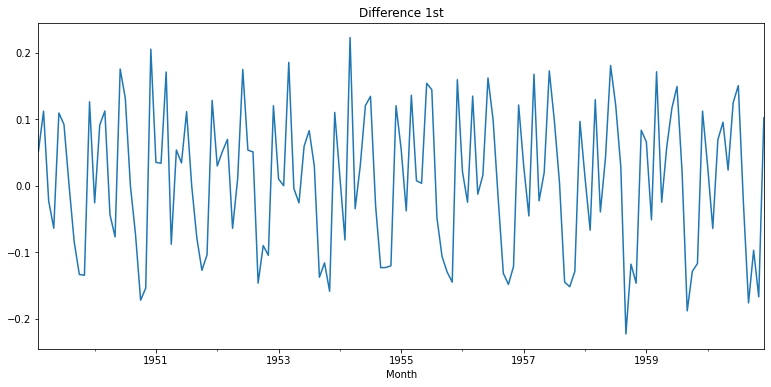

In [100]:
# d를 구하기 위해서 좀 다른 접근 >> d차 차분을 구해보고 시계열이 안정된 상태인지 확인

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


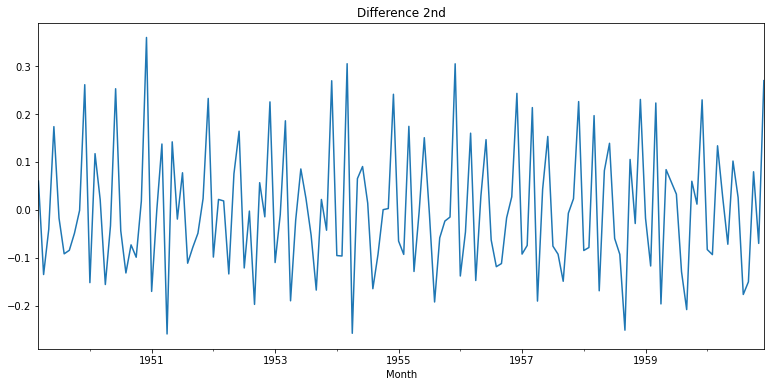

In [101]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### 3. 학습 데이터 분리

**시계열 데이터에서 학습**

- 분리 비율은 학습과 테스트에 9:1로 설정
- 시계열 예측이니 만큼 가장 나중 데이터를 테스트용으로  사용하는 것이 타당

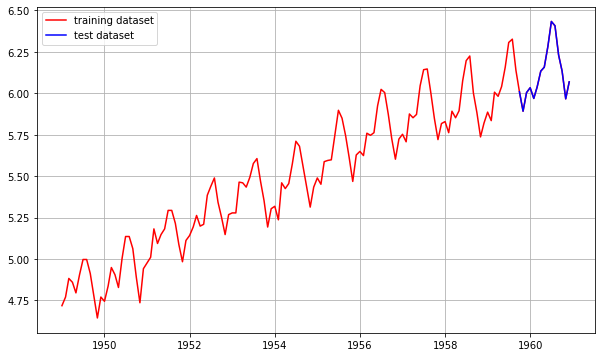

In [103]:
train_data, test_data =  ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c = 'r', label='training dataset') # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [105]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


## 3-8. ARIMA 모델 훈련과 추론

In [111]:
import warnings
warnings.filterwarnings('ignore')# 경고 무시

from statsmodels.tsa.arima.model import ARIMA as arima
# Build Model
model = arima(train_data, order=(14,1,0)) # 모수는 이전 그래프를 참고
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.942
Date:                Thu, 05 May 2022   AIC                           -409.883
Time:                        06:18:06   BIC                           -367.103
Sample:                    01-01-1949   HQIC                          -392.502
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2651      0.081     -3.277      0.001      -0.424      -0.107
ar.L2         -0.0044      0.108     -0.040      0.968      -0.216       0.208
ar.L3          0.0021      0.046      0.046      0.9

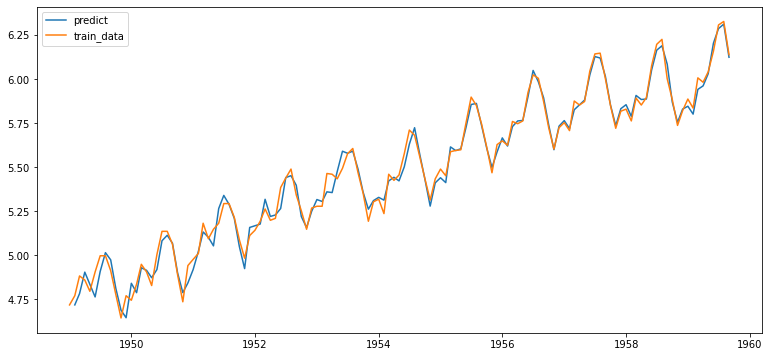

In [112]:
# ARIMA 모델의 훈련 결과를 시각적으로 확인

fitted_m = fitted_m.predict()
fitted_m =fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

**forecase() 매소드를 이용해 테스트 데이터 구간의 데이터를 예측한다.**

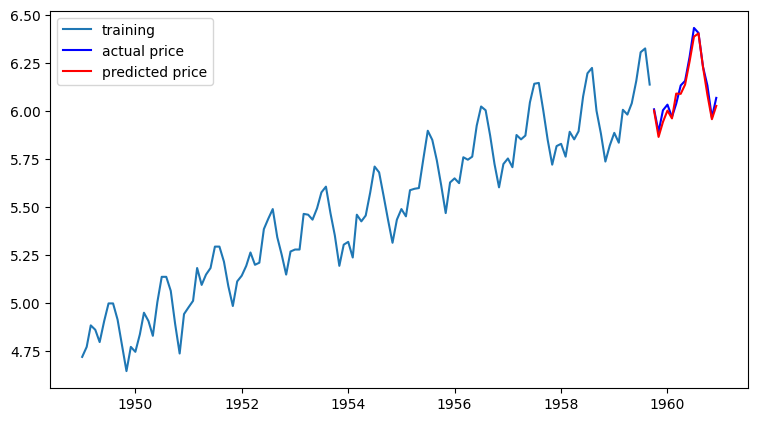

In [120]:
model = arima(train_data, order=(14,1,0)) # p값을 14으로 테스트
fitted_m = model.fit()
fc = fitted_m.forecast(len(test_data), alpha=0.05) # 95% confidence

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

**시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있다.**

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE :', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE :', mae)

rmse = math.sqrt(mse)
print('RMSE :', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE : 236.27939252509398
MAE : 12.55810531713422
RMSE : 15.371382258115045
MAPE: 2.76%
